In [1]:
print("Hello")

Hello


In [2]:
#UNCOMMENT IF YOU WANT TO ACCESS DATA

# import gdown
# import zipfile

# file_id = "1veZMWlBCTV_ZMwe7zTUjrsS5E73tV9ed"
# gdown.download(f"https://drive.google.com/uc?id={file_id}", "dataset.zip", quiet=False)

# # Extract ZIP
# with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
#     zip_ref.extractall("data")

In [3]:
import zipfile

zip_path = "all_json.zip"
extract_folder = "Match_data"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_folder)

print(f"Extracted files to folder: {extract_folder}")

Extracted files to folder: Match_data


In [4]:
import pandas as pd
import json
import os

folder = "Match_data"
rows = []

for f in os.listdir(folder):
    if f.endswith(".json"):
        with open(os.path.join(folder, f)) as file:
            data = json.load(file)
        info = data["info"]

        rows.append({
            "match_id": f.replace(".json", ""),
            "team1": info["teams"][0],
            "team2": info["teams"][1],
            "venue": info.get("venue"),
            "city": info.get("city"),
            "toss_winner": info.get("toss", {}).get("winner"),
            "toss_decision": info.get("toss", {}).get("decision"),
            "winner": info.get("outcome", {}).get("winner"),
            "date": info.get("dates", [None])[0],
            "match_type": info.get("match_type")
        })

df = pd.DataFrame(rows)

print(df.shape)
df.head() # seeing the first 5 rows

(20614, 10)


,match_id,team1,team2,venue,city,toss_winner,toss_decision,winner,date,match_type
0,1000851,Australia,South Africa,Western Australia Cricket Association Ground,Perth,South Africa,bat,South Africa,2016-11-03,Test
1,1000853,Australia,South Africa,Bellerive Oval,Hobart,South Africa,field,South Africa,2016-11-12,Test
2,1000855,Australia,South Africa,Adelaide Oval,None,South Africa,bat,Australia,2016-11-24,Test
3,1000881,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,Australia,bat,Australia,2016-12-15,Test
4,1000883,Australia,Pakistan,Melbourne Cricket Ground,None,Pakistan,bat,Australia,2016-12-26,Test


In [5]:
df["team1_home"]=df["team1"]==df["city"] # i am adding new extra features, basically checking if a particular team is playing in its home country
df["team2_home"]=df["team2_home"]=df["team2"]==df["city"]
df.head() # seeing the first 5 rows

,match_id,team1,team2,venue,city,toss_winner,toss_decision,winner,date,match_type,team1_home,team2_home
0,1000851,Australia,South Africa,Western Australia Cricket Association Ground,Perth,South Africa,bat,South Africa,2016-11-03,Test,False,False
1,1000853,Australia,South Africa,Bellerive Oval,Hobart,South Africa,field,South Africa,2016-11-12,Test,False,False
2,1000855,Australia,South Africa,Adelaide Oval,None,South Africa,bat,Australia,2016-11-24,Test,False,False
3,1000881,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,Australia,bat,Australia,2016-12-15,Test,False,False
4,1000883,Australia,Pakistan,Melbourne Cricket Ground,None,Pakistan,bat,Australia,2016-12-26,Test,False,False


In [6]:
df.info() #getting the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20614 entries, 0 to 20613
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       20614 non-null  object
 1   team1          20614 non-null  object
 2   team2          20614 non-null  object
 3   venue          20614 non-null  object
 4   city           18965 non-null  object
 5   toss_winner    20614 non-null  object
 6   toss_decision  20614 non-null  object
 7   winner         19040 non-null  object
 8   date           20614 non-null  object
 9   match_type     20614 non-null  object
 10  team1_home     20614 non-null  bool  
 11  team2_home     20614 non-null  bool  
dtypes: bool(2), object(10)
memory usage: 1.6+ MB


In [7]:
df.describe() # more info

,match_id,team1,team2,venue,city,toss_winner,toss_decision,winner,date,match_type,team1_home,team2_home
count,20614,20614,20614,20614,18965,20614,20614,19040,20614,20614,20614,20614
unique,20614,374,376,875,352,377,2,369,5689,6,2,2
top,wi_212064,England,Pakistan,Dubai International Cricket Stadium,London,England,field,Australia,2024-06-16,T20,False,False
freq,1,691,674,355,633,639,11801,753,30,12494,20477,20533


In [8]:
df.isnull().sum() #checking for any missing values

match_id            0
team1               0
team2               0
venue               0
city             1649
toss_winner         0
toss_decision       0
winner           1574
date                0
match_type          0
team1_home          0
team2_home          0
dtype: int64

In [9]:
# hawh so many missing values
# dropping the rows without winner because that is our target variable, so that rows of no use
df = df.dropna(subset=['winner'])

In [10]:
# Fill city with unknown
df['city']=df['city'].fillna('Unknown')

# just to confirm
df.isnull().sum()

match_id         0
team1            0
team2            0
venue            0
city             0
toss_winner      0
toss_decision    0
winner           0
date             0
match_type       0
team1_home       0
team2_home       0
dtype: int64

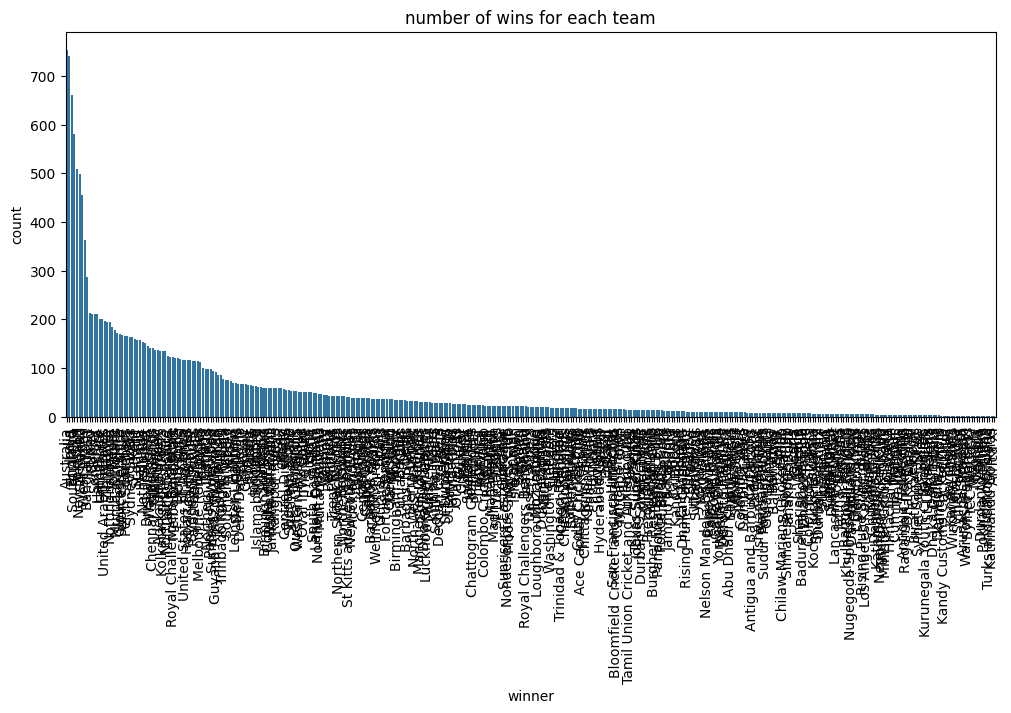

In [11]:
#done
#importing these for the plots for basic eda
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='winner',data=df,order=df['winner'].value_counts().index)
plt.xticks(rotation=90)
plt.title("number of wins for each team")
plt.show() # ah looks horrible, i even tried horizontal

In [12]:
# so i realized the data is dump of every match and here we are focusing only on international matches, so i am using only the data where team=country
# ka name 
teams_team1=df['team1'].unique()
teams_team2=df['team2'].unique()
all_teams=set(teams_team1).union(set(teams_team2))
print(sorted(all_teams))

['Abu Dhabi Knight Riders', 'Ace Capital Cricket Club', 'Adelaide Strikers', 'Africa XI', 'Andhra', 'Antigua Hawksbills', 'Antigua and Barbuda Falcons', 'Argentina', 'Arunachal Pradesh', 'Asia XI', 'Assam', 'Auckland', 'Auckland Aces', 'Australia', 'Austria', 'B-Love Kandy', 'Badureliya Sports Club', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Barbados Royals', 'Barbados Tridents', 'Barisal Bulls', 'Barisal Burners', 'Barmy Army', 'Baroda', 'Belgium', 'Belize', 'Bengal', 'Bermuda', 'Bhutan', 'Bihar', 'Biratnagar Kings', 'Birmingham Bears', 'Birmingham Phoenix', 'Bloomfield Cricket and Athletic Club', 'Boland', 'Botswana', 'Brazil', 'Brisbane Heat', 'Bulgaria', 'Burgher Recreation Club', 'Cambodia', 'Cameroon', 'Canada', 'Canterbury', 'Cape Cobras', 'Cape Town Blitz', 'Cayman Islands', 'Central Districts', 'Central Sparks', 'Central Stags', 'Chandigarh', 'Chattogram Challengers', 'Chennai Super Kings', 'Chhattisgarh', 'Chilaw Marians Cricket Club', 'Chile', 'China', 'Chittagong Kin

In [13]:
intl_teams = [
    'India', 'Australia', 'England', 'South Africa', 'Pakistan', 'New Zealand', 
    'Sri Lanka', 'West Indies', 'Bangladesh', 'Afghanistan', 'Ireland', 'Zimbabwe',
    'Netherlands', 'Scotland', 'Nepal', 'UAE', 'Oman', 'USA', 'Canada', 'Hong Kong', 
    'Namibia', 'Papua New Guinea', 'Bermuda', 'Kenya'
]
# so these are the teams, i used chatgpt to sort through and give me only country names and not local teams
df_intl=df[df['team1'].isin(intl_teams) & df['team2'].isin(intl_teams)] # so now we will focus only on international teams
print(df_intl.shape)  # check how many rows remain


(5612, 12)


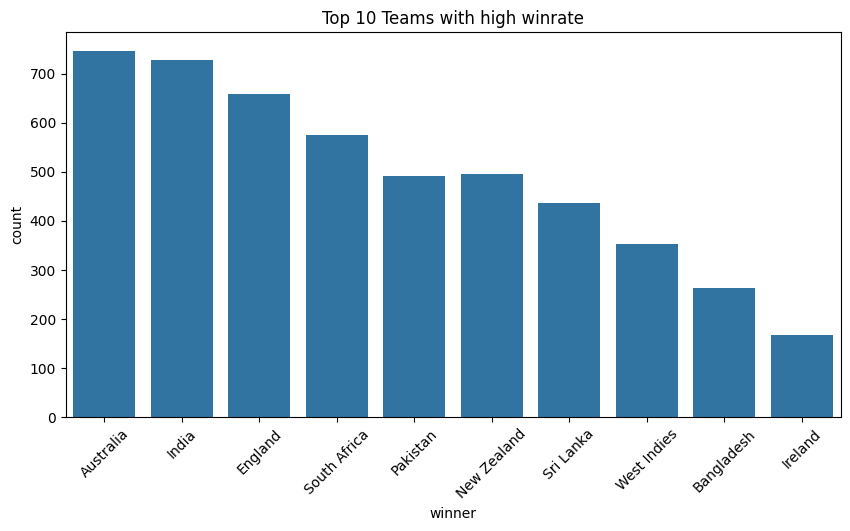

In [14]:
# doing basic eda charts here
#since there are soo many teams i am taking only the top ten to show in the chart
top_teams = df['winner'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.countplot(x='winner', data=df_intl, order=top_teams)
plt.xticks(rotation=45) # so the names can be read clearly
plt.title("Top 10 Teams with high winrate")
plt.show()

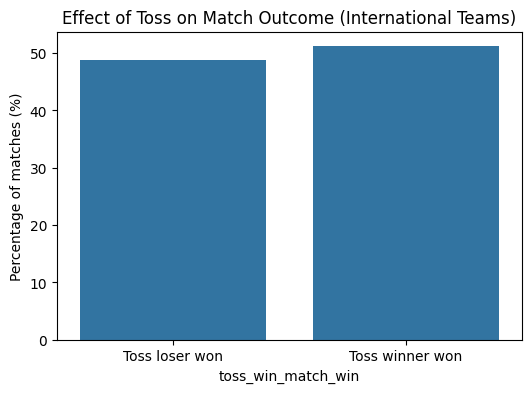

In [29]:
# so lets check if the toss winner wins the match or not
# here i am making new column to see if the toss winner and the winner is same , so true otherwise false
df_intl.loc[:, 'toss_win_match_win'] = df_intl['toss_winner'] == df_intl['winner']

# Count % of matches where toss winner won
toss_effect = df_intl['toss_win_match_win'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x=toss_effect.index, y=toss_effect.values)
plt.xticks([0,1], ['Toss loser won', 'Toss winner won'])
plt.ylabel("Percentage of matches (%)")
plt.title("Effect of Toss on Match Outcome (International Teams)")
plt.show()

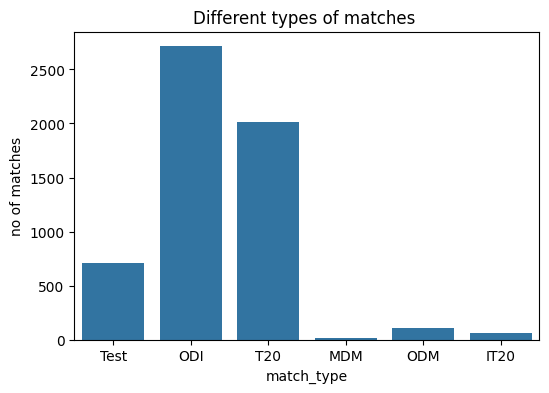

In [30]:
# eh i dont think it matters lets move on
# lets see what types are matches are these teams playin
plt.figure(figsize=(6,4))
sns.countplot(x='match_type', data=df_intl)
plt.title("Different types of matches ")
plt.ylabel("no of matches")
plt.show()


In [33]:
# odi and t20 seems the winner
# lets see how many matches are playin in a year

#ok so date was a numeric row, so i am converting it into one by to_datetime in pandas for easy computation and error so if empty it will put nat
df_intl.loc[:, 'date']=pd.to_datetime(df_intl['date'],errors='coerce') #added .loc to get rid of the waring
# check if null
print(df_intl['date'].isnull().sum())

0


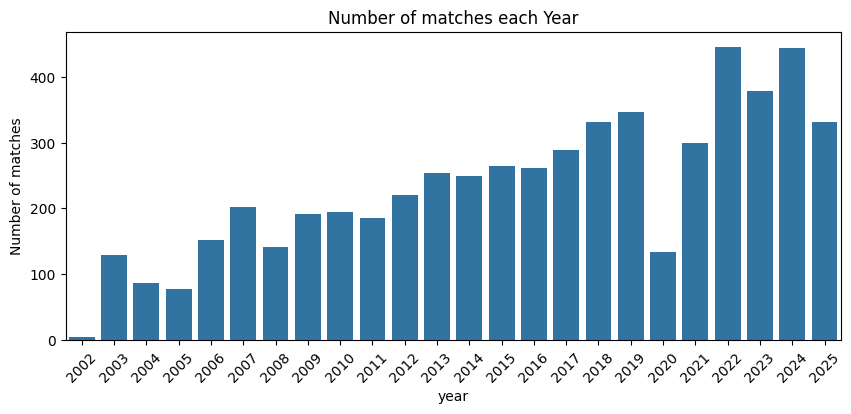

In [34]:
# now lets plot matches played each year
df_intl.loc[:, 'year'] = df_intl['date'].dt.year

plt.figure(figsize=(10,4))
sns.countplot(x='year', data=df_intl)
plt.xticks(rotation=45)
plt.title("Number of matches each Year")
plt.ylabel("Number of matches")
plt.show()


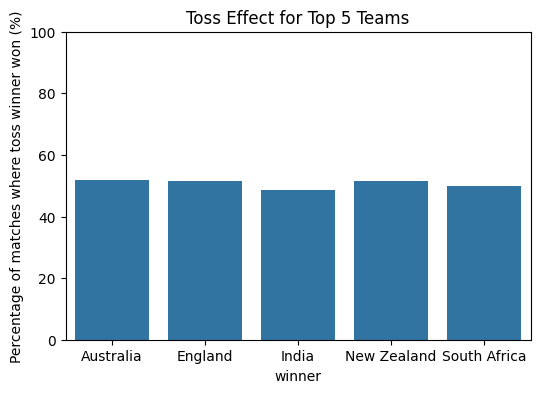

In [35]:
# Top 5 teams
top_teams = df_intl['winner'].value_counts().head(5).index
df_top = df_intl[df_intl['winner'].isin(top_teams)]

# Calculate % of toss winners who also won
# toss_effect_top = df_top.groupby('winner').apply(lambda x: (x['toss_winner']==x['winner']).mean()*100)
toss_effect_top = df_top.groupby('winner')['toss_winner'].apply(lambda x: (x==df_top.loc[x.index, 'winner']).mean()*100)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=toss_effect_top.index, y=toss_effect_top.values)
plt.ylabel("Percentage of matches where toss winner won (%)")
plt.title("Toss Effect for Top 5 Teams")
plt.ylim(0,100)
plt.show()


In [59]:
# drop target from features
X=df_intl.drop(columns=['winner','match_id','date','toss_winner'])  # drop match_id and date for now coz  not needed for analysis
y=df_intl['winner']
# checking shape again
print(X.shape,y.shape)

(5612, 10) (5612,)


In [60]:
# using one hot encoder to convert into binary to process
# using drop_first to avoid multicolinarity
X=pd.get_dummies(X, columns=['team1','team2','venue','city','toss_decision','match_type'], drop_first=True)

# Check resulting shape
print(X.shape)

(5612, 728)


In [67]:
X.loc[:, 'year'] = df_intl['date'].dt.year
X.loc[:, 'month'] = df_intl['date'].dt.month
X.loc[:, 'weekday'] = df_intl['date'].dt.weekday


In [68]:
#importing the model train test
from sklearn.model_selection import train_test_split
# 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [74]:
#importing these libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Sacling features
scaler=StandardScaler()
X_train_scaled=StandardScaler.fit_transform(X_train)
X_test_scaled=StandardScaler.transform(X_test)

# Initialize and train Logistic Regression
lr_model=LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred=lr_model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}\n")
print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression Accuracy: 0.62

                  precision    recall  f1-score   support

       Australia       0.67      0.74      0.70       149
      Bangladesh       0.68      0.60      0.64        53
         Bermuda       0.00      0.00      0.00         1
          Canada       0.60      0.86      0.71         7
         England       0.64      0.70      0.67       132
       Hong Kong       0.25      0.17      0.20         6
           India       0.73      0.64      0.68       146
         Ireland       0.62      0.71      0.66        34
           Kenya       0.67      0.50      0.57         8
         Namibia       0.45      0.60      0.51        15
           Nepal       0.50      0.53      0.52        15
     Netherlands       0.61      0.52      0.56        21
     New Zealand       0.67      0.72      0.69        99
            Oman       0.54      0.64      0.58        11
        Pakistan       0.55      0.51      0.53        98
Papua New Guinea       0.50      0.

In [69]:
# eh we can do better
# importing required things
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# create the model,i am using random forest first
model=RandomForestClassifier(n_estimators=100, random_state=42)

# Training
model.fit(X_train, y_train)

# Predicting the model
y_pred = model.predict(X_test)

# Accuracy
accuracy=accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy:{accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred,zero_division=0)) #added zero division 


Random Forest Accuracy:0.67
                  precision    recall  f1-score   support

       Australia       0.73      0.52      0.60       149
      Bangladesh       0.81      0.74      0.77        53
         Bermuda       0.00      0.00      0.00         1
          Canada       0.71      0.71      0.71         7
         England       0.63      0.82      0.71       132
       Hong Kong       0.00      0.00      0.00         6
           India       0.73      0.78      0.75       146
         Ireland       0.62      0.74      0.68        34
           Kenya       0.83      0.62      0.71         8
         Namibia       0.56      0.60      0.58        15
           Nepal       0.58      0.73      0.65        15
     Netherlands       0.80      0.76      0.78        21
     New Zealand       0.73      0.75      0.74        99
            Oman       0.50      0.64      0.56        11
        Pakistan       0.67      0.59      0.63        98
Papua New Guinea       0.67      0.57      

In [70]:
# Get feature importances
importances=model.feature_importances_

# Create a DataFrame
feat=pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort by importance
feat=feat.sort_values(by='importance', ascending=False)

# Show top 20 features
feat.head(20)


,feature,importance
3,year,0.062967
729,weekday,0.056831
728,month,0.053623
9,team1_India,0.034328
2,toss_win_match_win,0.030603
7,team1_England,0.027172
29,team2_India,0.026966
722,toss_decision_field,0.026611
20,team1_South Africa,0.024037
27,team2_England,0.022382


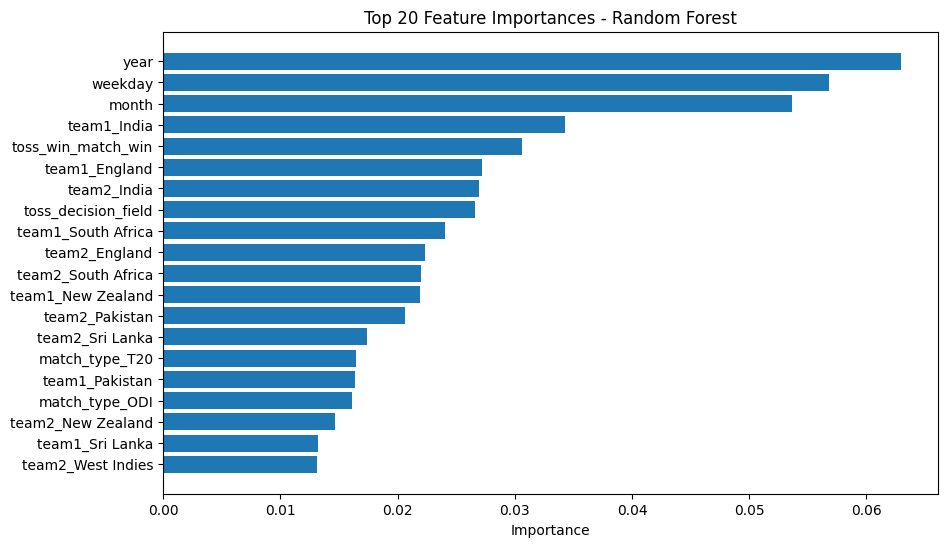

In [71]:
plt.figure(figsize=(10,6))
plt.barh(feat['feature'].head(20)[::-1], feat['importance'].head(20)[::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()


In [73]:
#lets try another model 87 is good but i feel we can do better
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# converting strings in numeric values
le=LabelEncoder()
y_train_enc=le.fit_transform(y_train)
y_test_enc=le.transform(y_test)

#traing the model here
xgb_clf = XGBClassifier(
n_estimators=500,
learning_rate=0.05,
max_depth=6,
subsample=0.8,
random_state=42,
# use_label_encoder=False,
eval_metric='mlogloss'
)
xgb_clf.fit(X_train, y_train_enc)

# Predict and decode labels
y_pred_enc=xgb_clf.predict(X_test)
y_pred=le.inverse_transform(y_pred_enc) # converting back to string

# checking how well is our model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy:{accuracy:.2f}\n")
print(classification_report(y_test, y_pred,zero_division=0))


XGBoost Accuracy:0.71

                  precision    recall  f1-score   support

       Australia       0.73      0.55      0.63       149
      Bangladesh       0.80      0.62      0.70        53
         Bermuda       0.00      0.00      0.00         1
          Canada       0.44      0.57      0.50         7
         England       0.68      0.81      0.74       132
       Hong Kong       0.33      0.17      0.22         6
           India       0.80      0.84      0.82       146
         Ireland       0.69      0.74      0.71        34
           Kenya       0.29      0.25      0.27         8
         Namibia       0.73      0.73      0.73        15
           Nepal       0.67      0.80      0.73        15
     Netherlands       0.71      0.57      0.63        21
     New Zealand       0.77      0.77      0.77        99
            Oman       0.77      0.91      0.83        11
        Pakistan       0.74      0.67      0.71        98
Papua New Guinea       0.58      1.00      0.74 

In [47]:
#huge improvement from 87 to 98
